In [34]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np


In [41]:
IMGAE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

In [42]:
dataset= tf.keras.preprocessing.image_dataset_from_directory(
    "Tomato",
    shuffle = True,
image_size = (IMGAE_SIZE,IMGAE_SIZE),
batch_size = BATCH_SIZE)

Found 3543 files belonging to 3 classes.


In [43]:
class_names=dataset.class_names
class_names

['Tomato_Early_blight', 'Tomato_Leaf_Mold', 'Tomato_healthy']

In [44]:
##Show one image batch 
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 2 2 2 2 1 2 2 2 1 2 0 1 2 2 0 1 2 2 1 0 1 1 1 0 2 1 0 0 2 2 2]


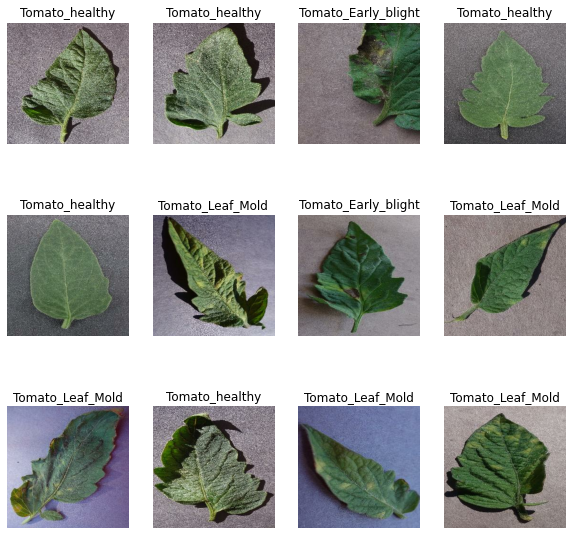

In [45]:
##Show image here
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [46]:
len(dataset)

111

In [47]:
##Splite data set to 20%=Training, 40% validation, 40% testing
## To know accurantely what 80% represents 
train_size=0.8
len(dataset)*train_size


88.80000000000001

In [48]:
dataset.take(88)

<TakeDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [49]:
##skipe 88
test_dataset=dataset.skip(88)
len(test_dataset)

23

In [50]:
## To know accurantely what 10% represents  of validation dataset
validation_size=0.1
len(dataset)*validation_size

11.100000000000001

In [51]:
validation_dataset=test_dataset.take(11)
len(validation_dataset)

11

In [52]:
##skipe test=50 
test_dataset=test_dataset.skip(11)
len(test_dataset)

12

In [15]:
##Function for partitions
def get_dataset_partitions_tf(ds, train_split=0.8, validation_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds= ds.shuffle(shuffle_size, seed=12)

    train_size= int(train_split*ds_size)
    validation_size= int(validation_split*ds_size)

    train_ds=ds.take(train_size)
    
    validation_ds=ds.skip(train_size).take(validation_size)
    test_ds=ds.skip(train_size).skip(validation_size)


    return  train_ds, validation_ds, test_ds

In [53]:
train_ds, validation_ds, test_ds= get_dataset_partitions_tf(dataset)

In [54]:
len(train_ds)

88

In [55]:
train_ds= train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_ds=  validation_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds= test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [56]:
##Creating layers for preprocessing
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMGAE_SIZE,IMGAE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)])

In [57]:
Data_augmentation= tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [58]:
##Building a model using convolutional neural network(CNN)

input_shape = (BATCH_SIZE, IMGAE_SIZE,IMGAE_SIZE, CHANNELS)
n_classes=12

model= models.Sequential([
    resize_and_rescale,
    Data_augmentation,
    layers.Conv2D(32,(3,3), activation='relu', input_shape= input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size= (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size= (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size= (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size= (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size= (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),

])
model.build(input_shape=input_shape)


In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [59]:
model.compile(
optimizer='adam',
 loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
metrics=['accuracy'])

In [60]:
##Mode fit
history= model.fit(
       train_ds,
        epochs=EPOCHS,
         batch_size=BATCH_SIZE,
         verbose=1,
          validation_data=validation_ds
)

Epoch 1/50
88/88 [==============================] - 190s 2s/step - loss: 1.0486 - accuracy: 0.5146 - val_loss: 0.6711 - val_accuracy: 0.6822
Epoch 2/50
88/88 [==============================] - 283s 3s/step - loss: 0.5467 - accuracy: 0.7731 - val_loss: 0.6428 - val_accuracy: 0.8047
Epoch 3/50
88/88 [==============================] - 302s 3s/step - loss: 0.4468 - accuracy: 0.8342 - val_loss: 0.4723 - val_accuracy: 0.8571
Epoch 4/50
88/88 [==============================] - 233s 3s/step - loss: 0.3914 - accuracy: 0.8505 - val_loss: 0.4705 - val_accuracy: 0.8367
Epoch 5/50
88/88 [==============================] - 231s 3s/step - loss: 0.3509 - accuracy: 0.8629 - val_loss: 1.4531 - val_accuracy: 0.6793
Epoch 6/50
88/88 [==============================] - 260s 3s/step - loss: 0.3403 - accuracy: 0.8697 - val_loss: 0.4057 - val_accuracy: 0.8863
Epoch 7/50
88/88 [==============================] - 261s 3s/step - loss: 0.2958 - accuracy: 0.8881 - val_loss: 0.4799 - val_accuracy: 0.8542
Epoch 8/50
88

In [61]:
acc= history.history['accuracy']
validation_acc=history.history['val_accuracy']

loss= history.history['loss']
validation_loss=history.history['val_loss']

first image to predict
first image actual label: Tomato_healthy
Tomato_healthy


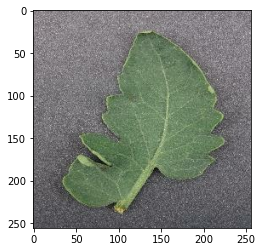

In [62]:
for images_batch, labels_batch in test_ds.take(1):

    first_image=images_batch[0].numpy().astype('uint8')
    first_label= labels_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("first image actual label:",class_names[ first_label])
    
    batch_prediction= model.predict(images_batch)
    print(class_names[np.argmax(batch_prediction[0])])

In [63]:
## Predication model take img+ model

def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array= tf.expand_dims(img_array,0)

    prediction= model.predict(img_array)
    
    predicted_class = class_names[np.argmax(prediction[0])]
    confidence = round(100 *(np.max(prediction[0])),2)
    return predicted_class, confidence

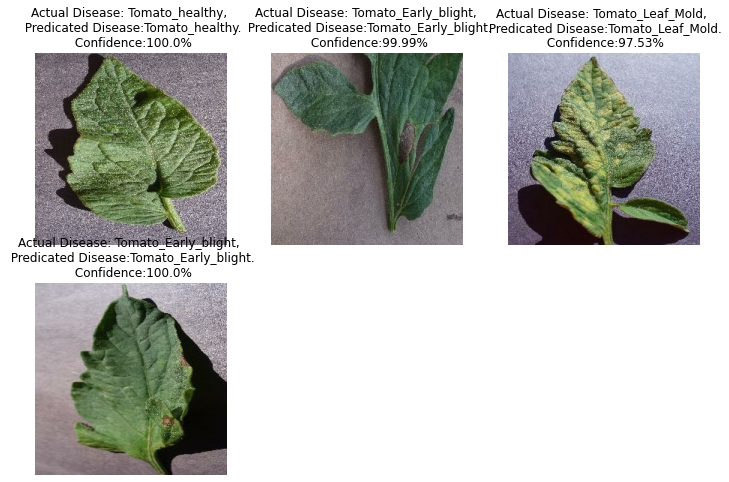

In [64]:
## Predication for the dataset
plt.figure(figsize=(12,12))
for images, labels in test_ds.take(1):
    for i in range(4):
        ax= plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicated_class, confidence= predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual Disease: {actual_class}, \n Predicated Disease:{predicated_class}.\n Confidence:{confidence}%")
        plt.axis("off")

In [65]:
##Versioning the models
import os
model_version=max([int(i) for i in os.listdir("../Tomato_Model")+[0]])+1
model.save(f"../Tomato_Model/{model_version}", save_format='h5')